**SlumpTest using Linear Regression**

This is all about Concrete slump test that has 10 features and 103 instances.

***Additional Information***
The data set includes 103 data points. There are 7 input variables, and 3 output variables in the data set. The initial data set included 78 data. After several years, we got 25 new data points.

Concrete is a highly complex material. The slump flow of concrete is not only determined by the water content, but that is also influenced by other concrete ingredients.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/LE1_Tripulca_K/dataset/slump_test.csv')

In [ ]:
# Initial dataset size
initial_rows, initial_cols = df.shape

# Handling null values
df.dropna(inplace=True)

# Handling duplicates
df.drop_duplicates(inplace=True)

# Drop unnecessary columns
columns_to_drop = ['No']
df.drop(columns=columns_to_drop, inplace=True)

# Updated dataset size
updated_rows, updated_cols = df.shape

# Display basic information about the dataset after cleaning
print("\nDataset Information After Cleaning:")
print(df.info())

# Display summary statistics of the dataset after cleaning
print("\nSummary Statistics After Cleaning:")
print(df.describe())

# Summary of cleaning process
print("\nCleaning Summary:")
print(f"Initial Dataset Size: {initial_rows} rows, {initial_cols} columns")
print(f"Updated Dataset Size: {updated_rows} rows, {updated_cols} columns")
print(f"Rows Removed: {initial_rows - updated_rows}")
print(f"Columns Removed: {initial_cols - updated_cols}")


Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB
None

Summary Statistics After Cleani

<Axes: >

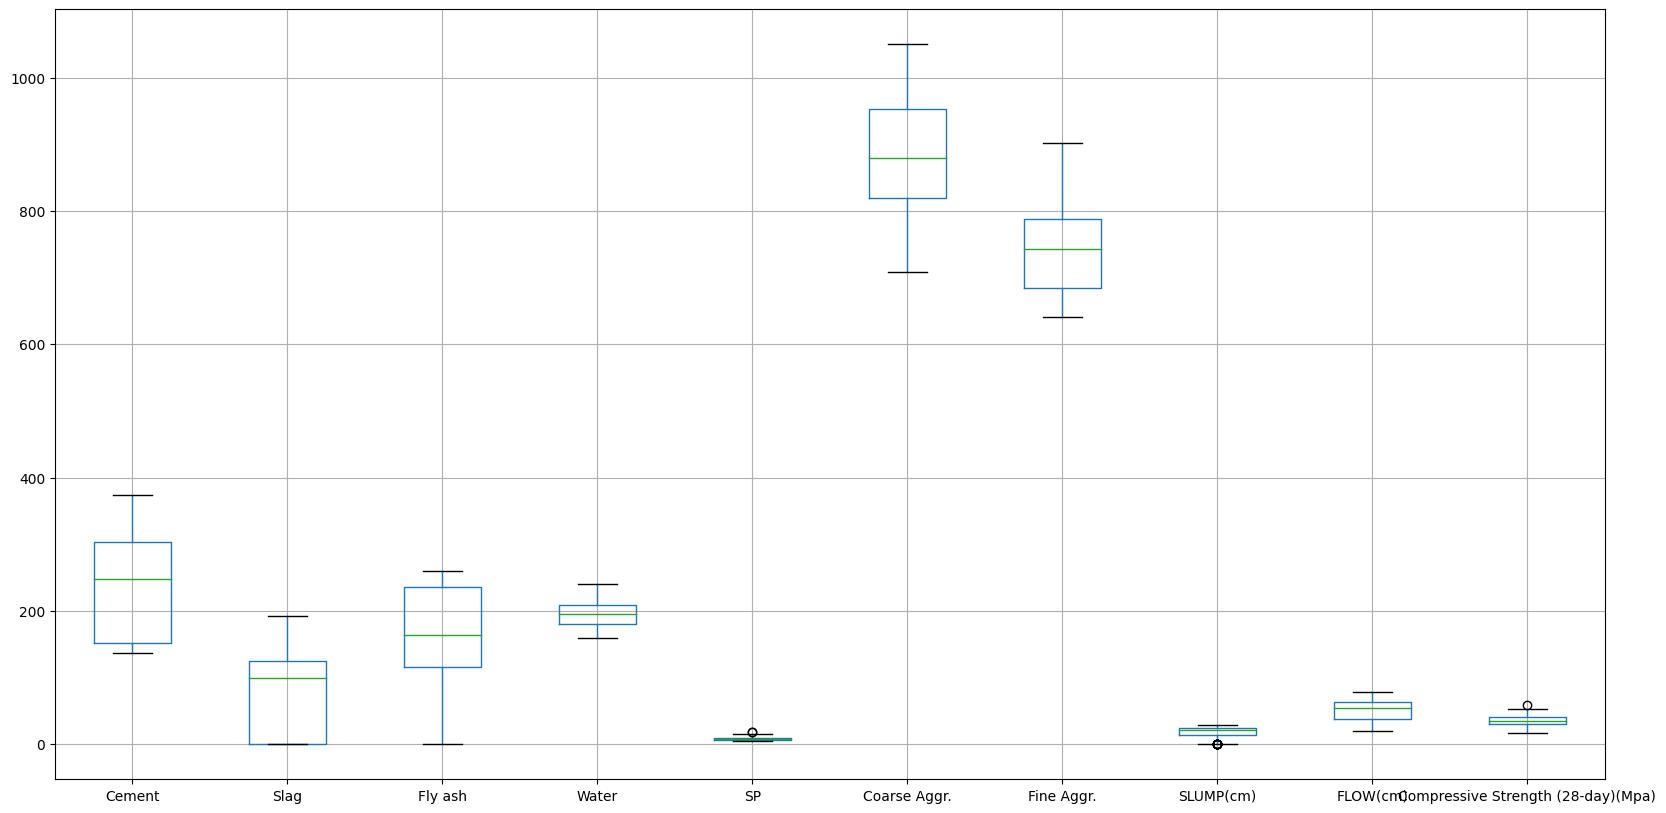

In [ ]:
# Checking outliers
plt.figure(figsize=(20,10))
df.boxplot()

No outliers found or already removed.


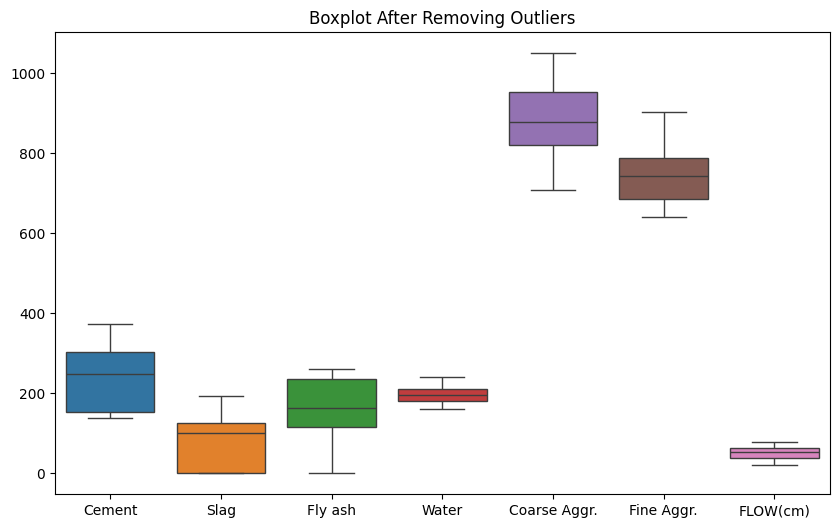

In [ ]:
# Original shape of the dataframe
original_shape = df.shape

# Remove outliers
Q1 = df.drop(columns=['SP', 'SLUMP(cm)', 'Compressive Strength (28-day)(Mpa)']).quantile(0.25)
Q3 = df.drop(columns=['SP', 'SLUMP(cm)', 'Compressive Strength (28-day)(Mpa)']).quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df.drop(columns=['SP', 'SLUMP(cm)', 'Compressive Strength (28-day)(Mpa)']) < (Q1 - 1.5 * IQR)) | (df.drop(columns=['SP', 'SLUMP(cm)', 'Compressive Strength (28-day)(Mpa)']) > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check if outliers have been removed
if original_shape != df_no_outliers.shape:
    print("Outliers have been removed.")
else:
    print("No outliers found or already removed.")

# Plot boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers.drop(columns=['SP', 'SLUMP(cm)', 'Compressive Strength (28-day)(Mpa)']))
plt.title('Boxplot After Removing Outliers')
plt.show()

In [ ]:
#Splitting dataset
X =df.drop("Compressive Strength (28-day)(Mpa)", axis=1)
y =df["Compressive Strength (28-day)(Mpa)"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

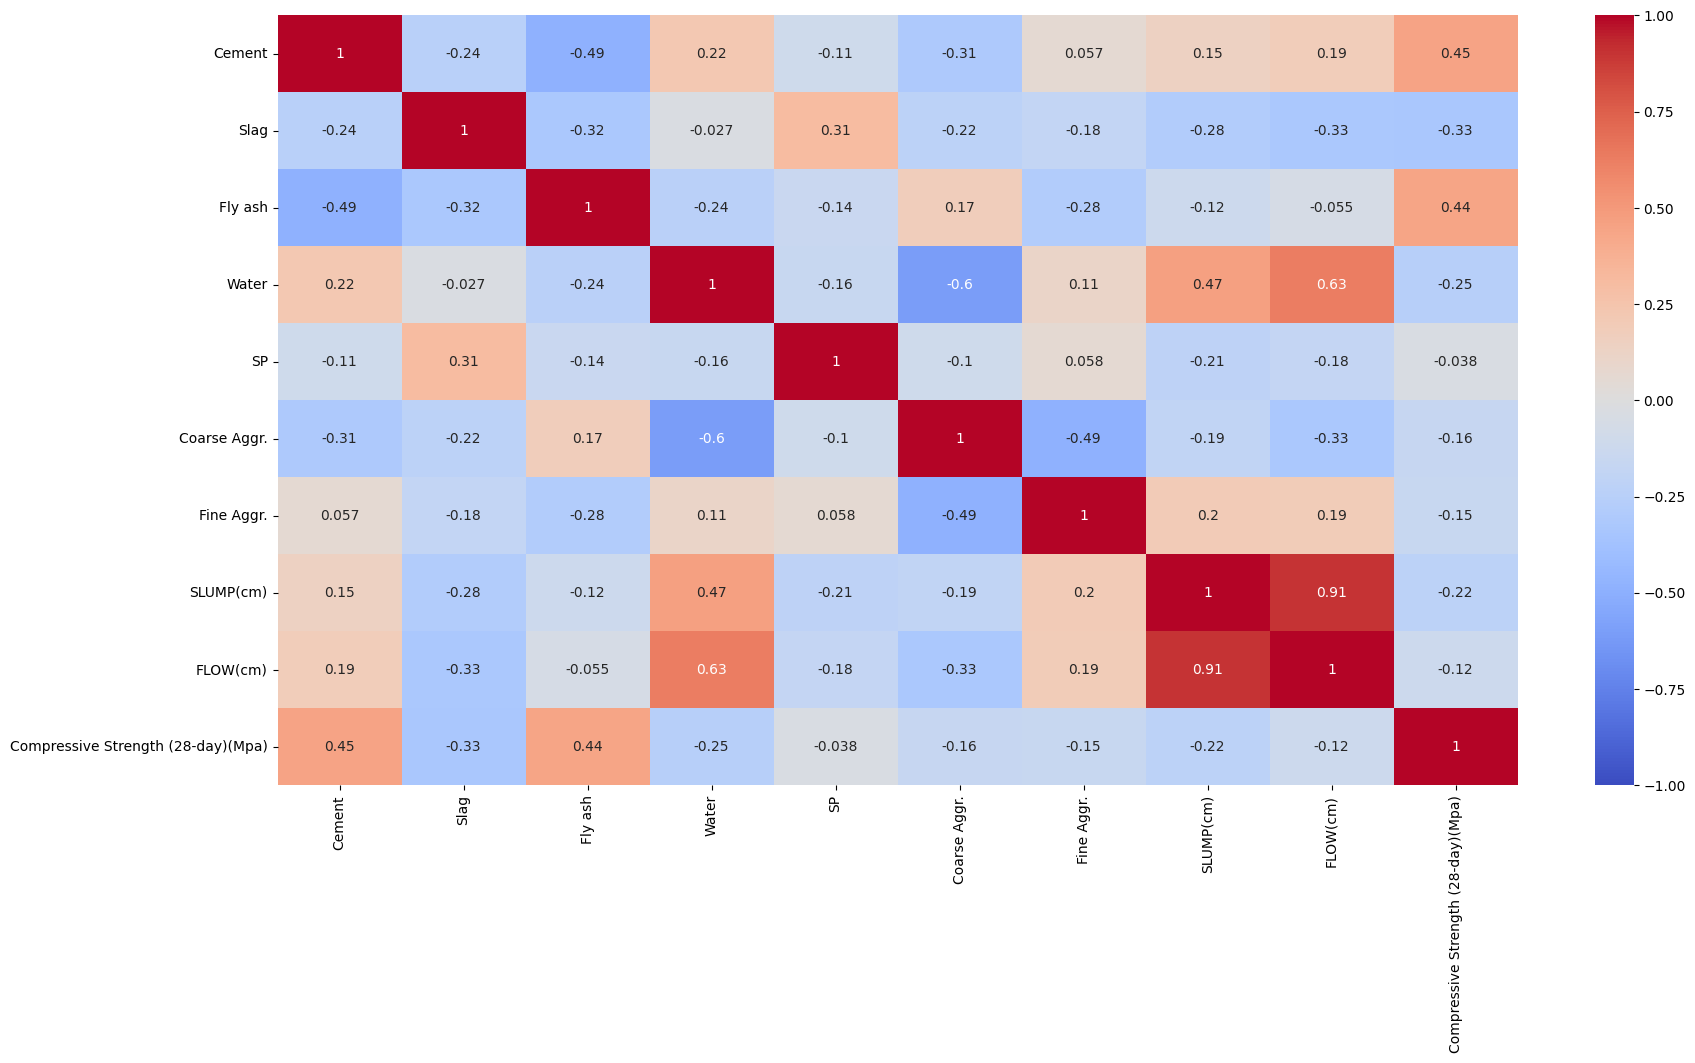

In [ ]:
# Checking multicollinearity
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Selected Features based on importance:
Index(['Water', 'SLUMP(cm)'], dtype='object')


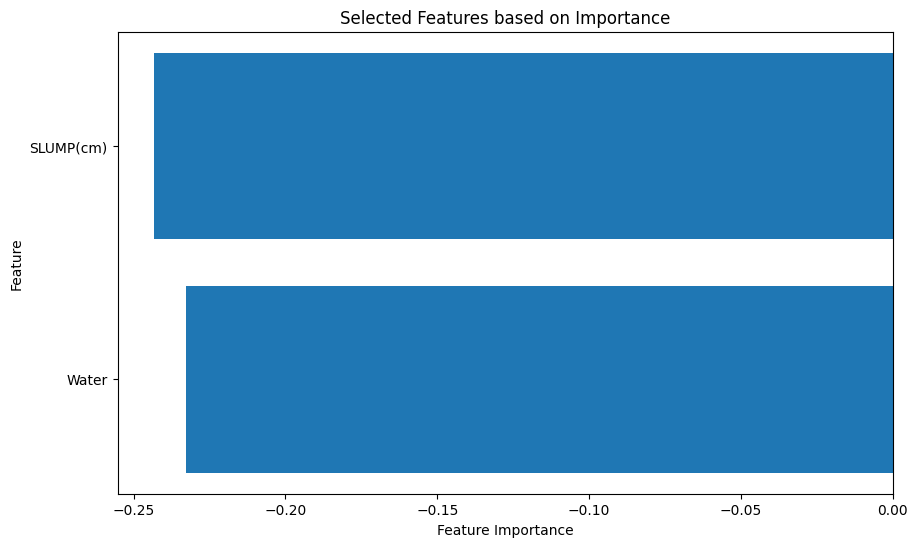

In [ ]:
# Handling multicollinearity by selecting best features based on importance
model = LinearRegression()
model.fit(X_train, y_train)
if hasattr(model, 'coef_'):
    feature_importance = model.coef_
else:
    feature_importance = model.feature_importances_

selector = SelectFromModel(model, threshold='mean')
selector.fit(X_train, y_train)

selected_feature_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_feature_indices]

print("Selected Features based on importance:")
print(selected_features)

plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_features)), feature_importance[selected_feature_indices], align='center')
plt.yticks(range(len(selected_features)), selected_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Selected Features based on Importance')
plt.show()

Linear Regression Model Accuracy: 0.9119795179382073


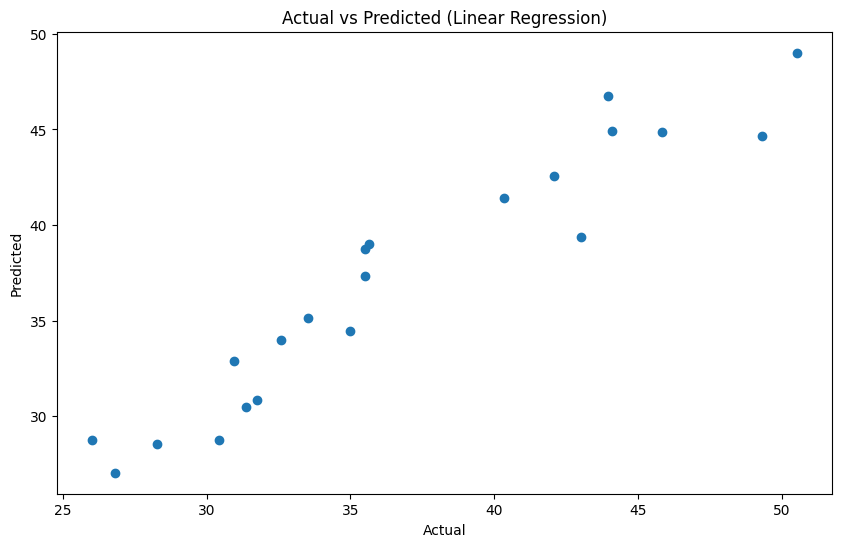

In [ ]:
# Fit the model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg_model.predict(X_test)

# Evaluate the model
linear_reg_accuracy = linear_reg_model.score(X_test, y_test)
print("Linear Regression Model Accuracy:", linear_reg_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

In [ ]:
# Data Leakage Prevention
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Model Training and Evaluation
lm = LinearRegression()
pipeline_lm = Pipeline([("scaler", scaler), ("lm", lm)])
pipeline_lm.fit(X_train_scaled, y_train)
y_pred = pipeline_lm.predict(X_test_scaled)
y_train_pred = pipeline_lm.predict(X_train_scaled)

# Model Evaluation
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    scores = {
        model_name + "_train" : {
            "R2" : r2_score(y_train, y_train_pred),
            "MAE" : mean_absolute_error(y_train, y_train_pred),
            "MSE" : mean_squared_error(y_train, y_train_pred),
            "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        model_name + "_test" : {
            "R2" : r2_score(y_test, y_pred),
            "MAE" : mean_absolute_error(y_test, y_pred),
            "MSE" : mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
        }
    }
    return pd.DataFrame(scores)

ls = train_val(y_train , y_train_pred, y_test, y_pred, "linear")
print(ls)


      linear_train  linear_test
R2        0.907235     0.911980
MAE       1.935449     1.740796
MSE       5.870661     4.453592
RMSE      2.422945     2.110353


R-squared (R2): The R-squared values for the training and test sets are 0.907 and 0.912, respectively. R-squared measures the proportion of the variance in the target variable that is explained by the model. These values indicate that the model explains approximately 90.7% of the variance in the training data and 91.2% in the test data, suggesting that the model fits the data well and generalizes effectively.

Mean Absolute Error (MAE): The mean absolute error values for the training and test sets are 1.935 and 1.741, respectively. MAE represents the average absolute difference between the actual and predicted values. Lower MAE values indicate better model performance. These values suggest that, on average, the model's predictions deviate by approximately 1.935 units from the actual values in the training set and 1.741 units in the test set.

Mean Squared Error (MSE): The mean squared error values for the training and test sets are 5.871 and 4.454, respectively. MSE measures the average of the squared differences between the actual and predicted values. Lower MSE values indicate better model performance. These values suggest that, on average, the squared deviations of the model's predictions from the actual values are approximately 5.871 in the training set and 4.454 in the test set.

Root Mean Squared Error (RMSE): The root mean squared error values for the training and test sets are 2.423 and 2.110, respectively. RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors in the predicted values. Lower RMSE values indicate better model performance. These values suggest that, on average, the model's predictions deviate by approximately 2.423 units from the actual values in the training set and 2.110 units in the test set.



In [ ]:
# Cross-validation
model = Pipeline([("scaler", scaler), ("lm", lm)])
scores = cross_validate(model, X_train, y_train, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], cv=5)
print(pd.DataFrame(scores, index=range(1, 6)))


   fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  0.010518    0.002815  0.942346                     -1.906373   
2  0.004418    0.003376  0.706621                     -2.647230   
3  0.004547    0.002533  0.865968                     -1.482924   
4  0.005438    0.004071  0.923134                     -2.244924   
5  0.007961    0.004208  0.793961                     -2.863530   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                    -4.634089                         -2.152693  
2                   -10.756961                         -3.279781  
3                    -3.724837                         -1.929984  
4                    -8.437617                         -2.904758  
5                   -11.663462                         -3.415181  


Fit Time and Score Time: The fit time and score time indicate the time taken for model fitting and scoring, respectively. The values seem consistent across the folds, suggesting that the model's training and evaluation processes are efficient and stable.

Test R-squared (test_r2): The test R-squared values range from approximately 0.707 to 0.942 across different folds. R-squared measures the proportion of the variance in the target variable that is explained by the model. Higher R-squared values indicate better model performance. These results suggest that the model performs well in capturing the variance in the target variable across different folds, with an average R-squared value of approximately 0.846.

Negative Mean Absolute Error (test_neg_mean_absolute_error): The negative mean absolute error values range from approximately -1.483 to -2.864. Mean absolute error represents the average absolute difference between the actual and predicted values. Lower negative mean absolute error values indicate better model performance. These results suggest that, on average, the model's predictions deviate by approximately 1.483 to 2.864 units from the actual values.

Negative Mean Squared Error (test_neg_mean_squared_error): The negative mean squared error values range from approximately -3.725 to -11.663. Mean squared error measures the average of the squared differences between the actual and predicted values. Lower negative mean squared error values indicate better model performance. These results suggest that, on average, the squared deviations of the model's predictions from the actual values are approximately 3.725 to 11.663.

Negative Root Mean Squared Error (test_neg_root_mean_squared_error): The negative root mean squared error values range from approximately -1.930 to -3.415. Root mean squared error is the square root of the mean squared error and provides a measure of the average magnitude of the errors in the predicted values. Lower negative root mean squared error values indicate better model performance. These results suggest that, on average, the model's predictions deviate by approximately 1.930 to 3.415 units from the actual values.

In [ ]:
# Tuning
model = Pipeline([
    ("scaler", StandardScaler()),
    ("lm", LinearRegression())
])

param_grid = {
    'lm__fit_intercept': [True, False]
}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'lm__fit_intercept': True}
Best score: 7.843393127523482


The best score obtained from the grid search is approximately 7.843. The score is calculated as the negative mean squared error, and a lower value indicates better model performance. In this case, the negative mean squared error represents the average squared difference between the actual and predicted values.